> ## **Heatmap**

### Allowed functions : ```import pandas as pd, import sqlite3, import matplotlib.pyplot as plt, from mpl_toolkits.axes_grid1 import make_axes_locatable```

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
select *
from sqlite_master
where type like 'table'
'''

pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,pageviews,pageviews,2,"CREATE TABLE ""pageviews"" (\n""index"" INTEGER,\n..."
1,table,checker,checker,19,"CREATE TABLE ""checker"" (\n""index"" INTEGER,\n ..."
2,table,deadlines,deadlines,83,"CREATE TABLE ""deadlines"" (\n""index"" INTEGER,\n..."


In [13]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
select uid, timestamp
from checker
where 
uid not like 'admin%'
'''

commits=pd.read_sql(query,conn,parse_dates='timestamp')
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [31]:
WeekDays = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
commits['weekday'] = commits['timestamp'].apply(lambda x: WeekDays[x.dayofweek])
commits['hour'] = commits['timestamp'].dt.hour
commits

,uid,timestamp,weekday,hour
0,user_4,2020-04-17 05:19:02.744528,Fri,5
1,user_4,2020-04-17 05:22:35.249331,Fri,5
2,user_4,2020-04-17 05:22:45.549397,Fri,5
3,user_4,2020-04-17 05:34:14.691200,Fri,5
4,user_4,2020-04-17 05:34:24.422370,Fri,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,Thu,20
3203,user_1,2020-05-21 20:22:41.785725,Thu,20
3204,user_1,2020-05-21 20:22:41.877806,Thu,20
3205,user_1,2020-05-21 20:37:00.129678,Thu,20


In [23]:
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
commits['weekday'] = pd.Categorical(commits['weekday'], categories=ordered_days, ordered=True)

In [24]:
pivot_week=pd.pivot_table(commits,values='timestamp',index='weekday',columns='uid',aggfunc='count',fill_value=0)
pivot_week

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,3,0,0,0,2,3,50,0,10,8,...,0,0,9,46,2,5,35,1,0,0
Tue,0,0,16,0,1,57,87,0,5,4,...,0,7,26,11,3,0,86,0,5,0
Wed,0,1,37,0,0,0,0,0,0,1,...,0,44,32,0,1,0,33,4,3,0
Thu,0,39,77,0,7,4,17,5,14,17,...,15,12,25,7,20,7,108,2,0,15
Fri,0,0,1,0,0,0,0,0,0,0,...,0,7,1,59,3,35,61,0,0,0
Sat,0,1,4,0,7,28,79,4,0,32,...,0,12,2,3,22,90,0,2,0,46
Sun,0,43,2,8,76,23,26,20,31,0,...,27,32,26,8,21,7,45,9,0,26


In [27]:
pivot_week = pivot_week.loc[:, pivot_week.sum().sort_values(ascending=False).index]
pivot_week

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,8,0,1,0,0


In [36]:
pivot_hour=pd.pivot_table(commits,values='timestamp',index='hour',columns='uid',aggfunc='count',fill_value=0)
pivot_hour = pivot_hour.loc[:, pivot_hour.sum().sort_values(ascending=False).index]
pivot_hour=pivot_hour.reindex(range(24), fill_value=0)
pivot_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,0,1,0,1,0


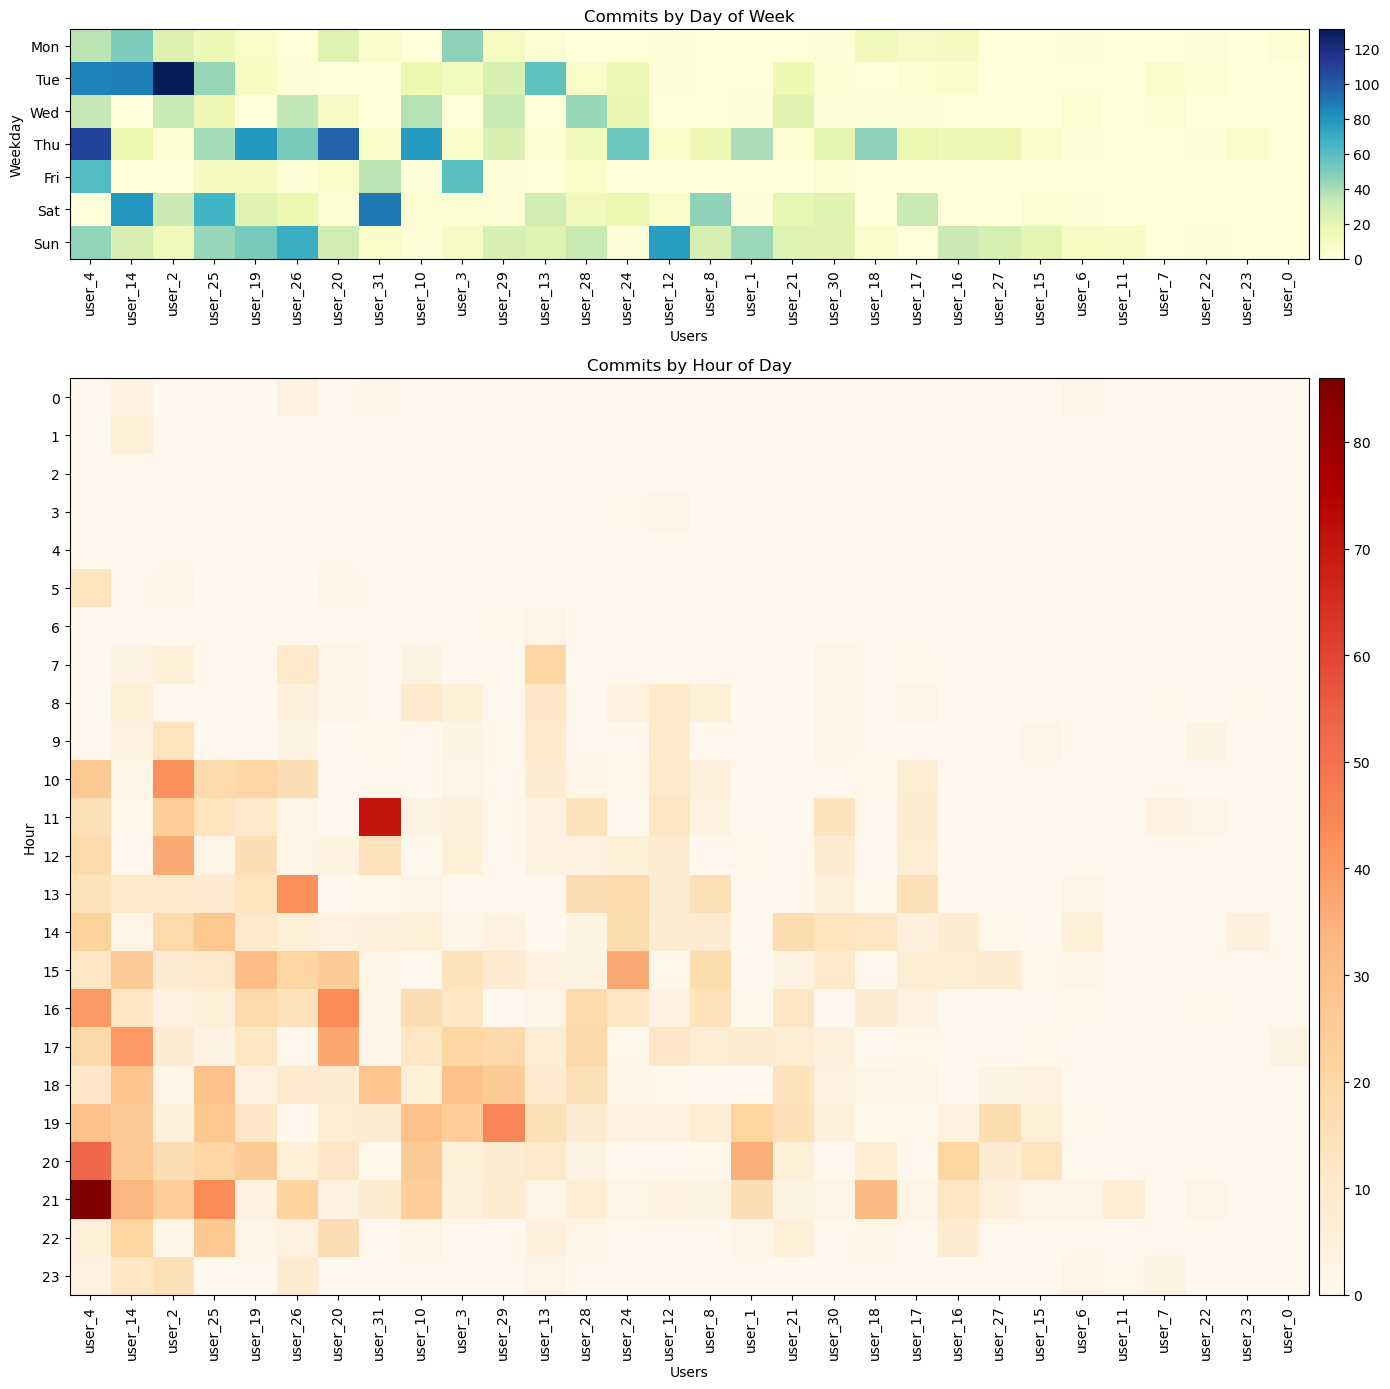

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(14, 14), gridspec_kw={'height_ratios': [1, 4]})

# HEATMAP 1: pivot_week
im1 = axs[0].imshow(pivot_week, aspect='auto', cmap='YlGnBu')
axs[0].set_title("Commits by Day of Week")
axs[0].set_ylabel("Weekday")
axs[0].set_xlabel("Users")
axs[0].set_yticks(range(len(pivot_week.index)))
axs[0].set_yticklabels(pivot_week.index)
axs[0].set_xticks(range(len(pivot_week.columns)))
axs[0].set_xticklabels(pivot_week.columns, rotation=90)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="2%", pad=0.1)
fig.colorbar(im1, cax=cax1)


# HEATMAP 2: pivot_hour
im2 = axs[1].imshow(pivot_hour, aspect='auto', cmap='OrRd')
axs[1].set_title("Commits by Hour of Day")
axs[1].set_ylabel("Hour")
axs[1].set_xlabel("Users")
axs[1].set_yticks(range(len(pivot_hour.index)))
axs[1].set_yticklabels(pivot_hour.index)
axs[1].set_xticks(range(len(pivot_hour.columns)))
axs[1].set_xticklabels(pivot_hour.columns, rotation=90)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="2%", pad=0.1)
fig.colorbar(im2, cax=cax2)

plt.tight_layout()
plt.show()

## У какого пользователя больше всего коммитов во вторник?
>user_2
## У какого пользователя больше всего коммитов в четверг?
>user_4
## В какой день недели пользователям не нравится делать много коммитов? 
>Пятница (Fri)
## Какой пользователь в какое время сделал наибольшее количество коммитов? 
>user_4 21:00

In [48]:
conn.close()